### last modified in 25-05-2019 11:00 by afek adler

# Imports

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [107]:
df = pd.read_csv('avocado.csv',index_col = 0)
def first_glence(df):
    """
    suitable only for jupyter because the display function doesn't exist in python
    :param df: pandas_dataframe
    :param save_csv: if dave the details to csv
    :return: None
    """
    frames = {}
    frames['head'] = df.head(2)
    frames['missing_values'] = df.isna().sum() / df.shape[0]
    frames['dtypes'] = df.dtypes
    frames.update({dtype: df.select_dtypes(include=[dtype]).describe() for dtype in df.dtypes.unique()})
    for frame_name, frame in frames.items():
        print('{} :'.format(frame_name))
        print("***" * 10)
        display(frame)
        print('\n')
first_glence(df)

head :
******************************


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany




missing_values :
******************************


Date            0.0
AveragePrice    0.0
Total Volume    0.0
4046            0.0
4225            0.0
4770            0.0
Total Bags      0.0
Small Bags      0.0
Large Bags      0.0
XLarge Bags     0.0
type            0.0
year            0.0
region          0.0
dtype: float64



dtypes :
******************************


Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object



object :
******************************


,Date,type,region
count,18249,18249,18249
unique,169,2,54
top,2018-01-14,conventional,Jacksonville
freq,108,9126,338




float64 :
******************************


,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000




int64 :
******************************


,year
count,18249.000000
mean,2016.147899
std,0.939938
min,2015.000000
25%,2015.000000
50%,2016.000000
75%,2017.000000
max,2018.000000


# there are ~50 region:
1. we will focus on 8 regions in the east coast
2. the type column indicates the type of the avocado - there are regular and organic ones

In [108]:
# we choose to focus on some main cities in the us east coast
cities = ['Atlanta','Boston','Chicago','Detroit', 'Orlando', 'Philadelphia','NewYork','Nashville']
df = df[df.region.isin(cities)]
df_conventional = df[df.type == 'conventional']
df_organic = df[df.type == 'organic']

# CORREALATION PLOT

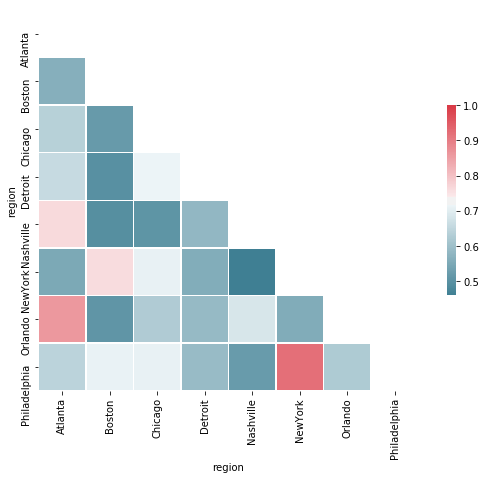

In [109]:
corr = df_conventional.pivot('Date','region','Total Volume').corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(10, 7))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, 
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Demand as function of the price:
1. regular Avocados 
2. organic avocado

(0.5, 2.25)

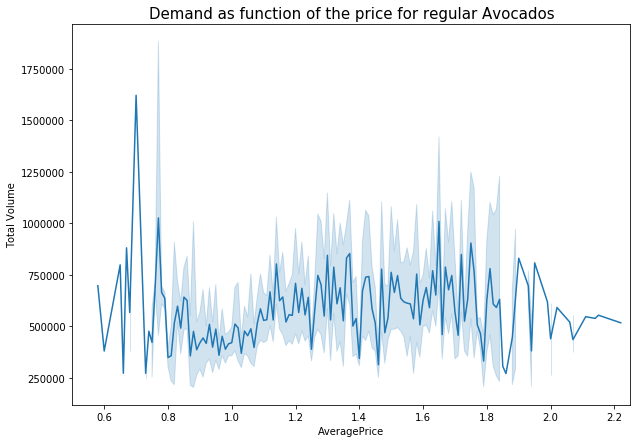

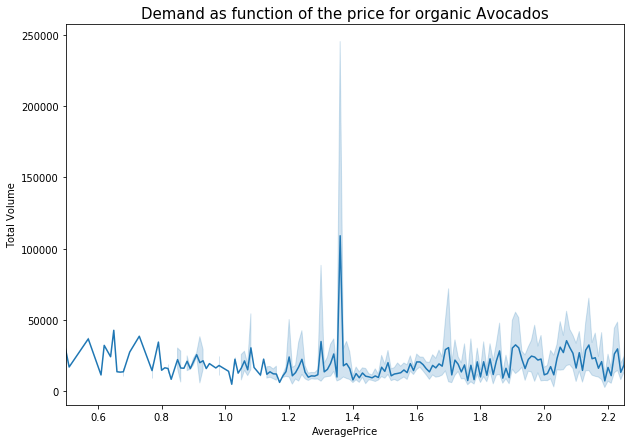

In [110]:
plt.figure(figsize=(10,7))
ax = sns.lineplot(data = df_conventional, x = 'AveragePrice', y ='Total Volume')
ax.set_title("Demand as function of the price for regular Avocados", size = 15)
ax.set_xlim(0.5,2.25)

plt.figure(figsize=(10,7))
ax = sns.lineplot(data = df_organic, x = 'AveragePrice', y ='Total Volume' )
ax.set_title("Demand as function of the price for organic Avocados", size = 15)
ax.set_xlim(0.5,2.25)

# We will choose to focus either on 4225 Avocados sold or Total Volume sold

Text(0.5, 0.98, 'Demand function of the price for regular 4225 Avocados \n By city')

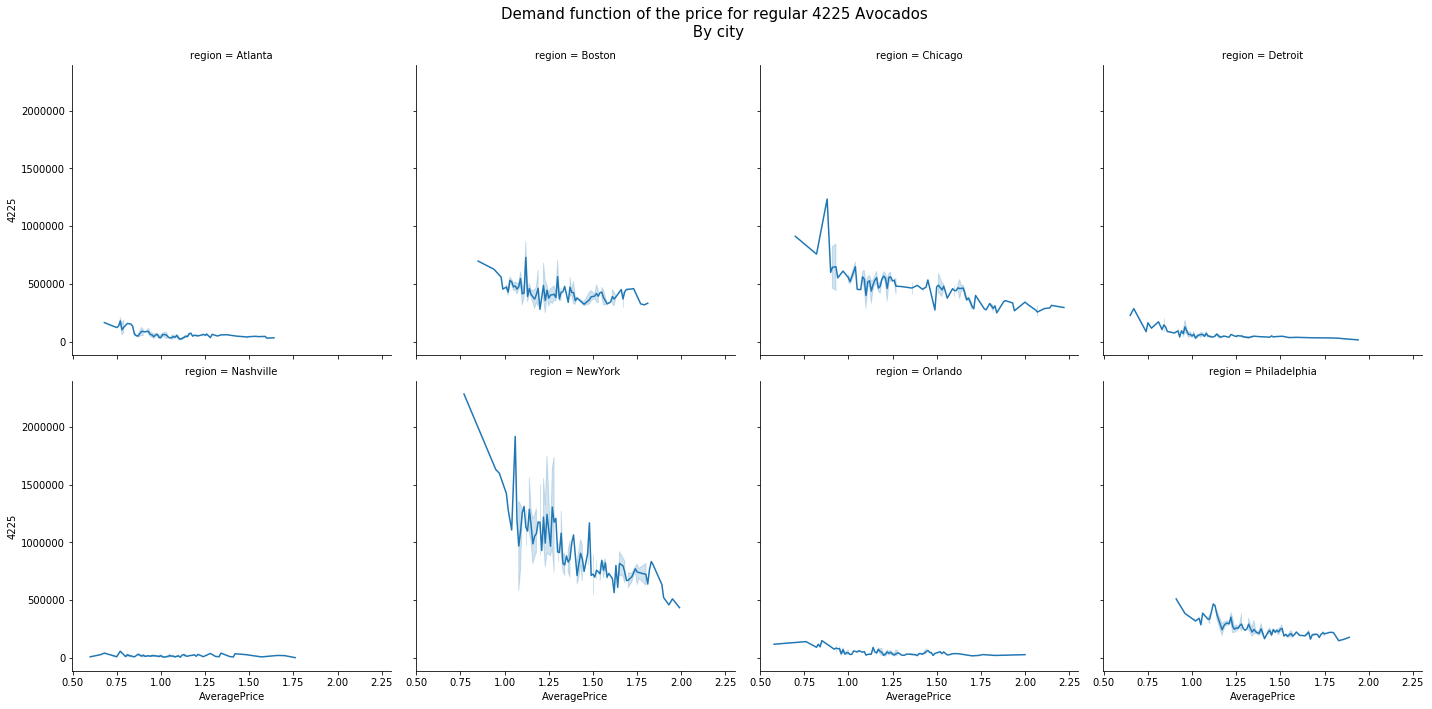

In [111]:
g = sns.FacetGrid(df_conventional, col= "region",col_wrap=4, height = 5)
g.map(sns.lineplot,'AveragePrice', '4225' )
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Demand function of the price for regular 4225 Avocados \n By city', size = 15) 

Text(0.5, 0.98, 'Demand function of the price for Total Volume of Avocados \n By city')

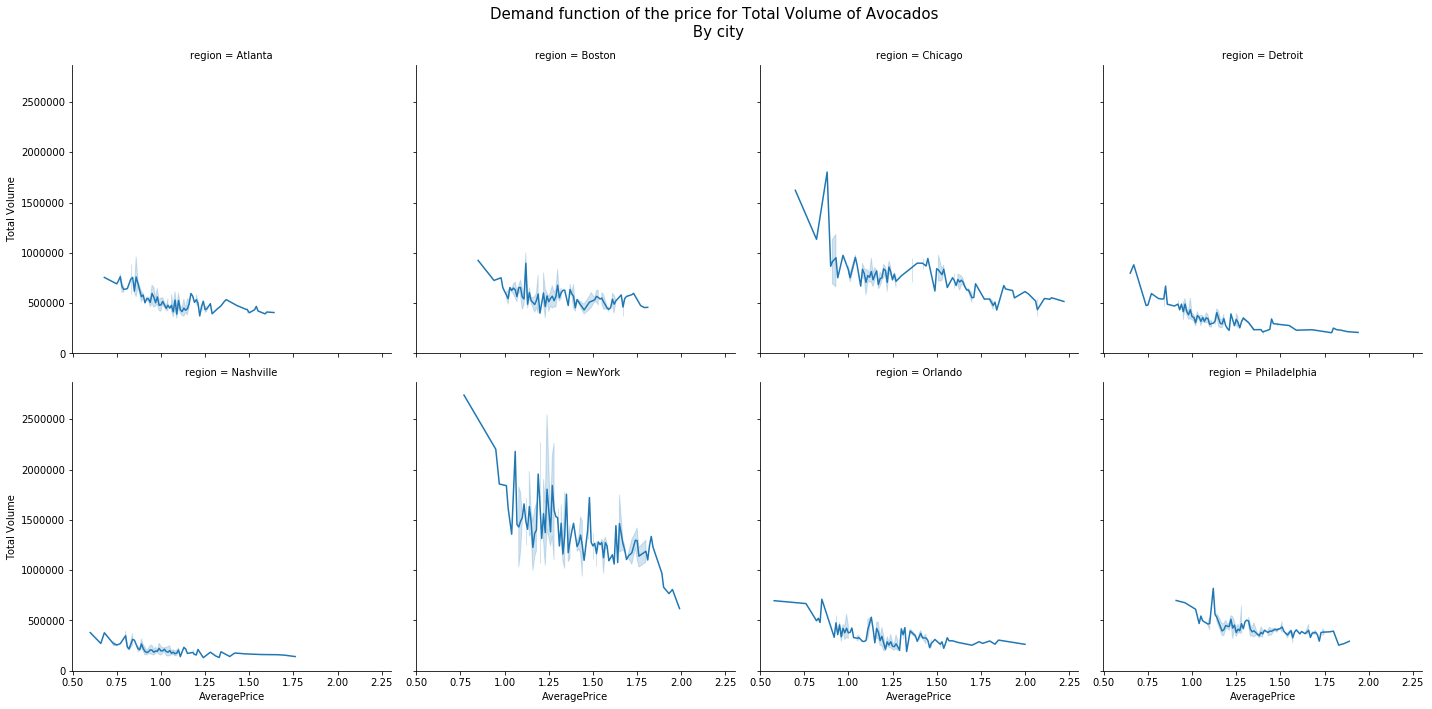

In [112]:
g = sns.FacetGrid(df_conventional, col= "region",col_wrap=4, height = 5)
g.map(sns.lineplot,'AveragePrice', 'Total Volume' )
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Demand function of the price for Total Volume of Avocados \n By city', size = 15) 

## based on the above graphs We will choose to focus on Total Volume sold because some cities dont cell 4225 avocados 

In [113]:
df_conventional = df_conventional[['Date','AveragePrice','Total Volume','year','region']]
df_conventional.Date = df_conventional.Date.astype('datetime64')
df_conventional['month'] = df_conventional.Date.dt.month
df_conventional['week'] = df_conventional.Date.dt.week
"""
day of week returns the same day for all the samples
"""
df_conventional.head()

C:\Users\afeki\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
C:\Users\afeki\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\afeki\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,Date,AveragePrice,Total Volume,year,region,month,week
0,2015-12-27,0.99,386100.49,2015,Atlanta,12,52
1,2015-12-20,1.08,331377.53,2015,Atlanta,12,51
2,2015-12-13,0.96,417772.47,2015,Atlanta,12,50
3,2015-12-06,1.07,357636.82,2015,Atlanta,12,49
4,2015-11-29,0.99,333280.79,2015,Atlanta,11,48


Text(0.5, 0.98, 'Total Volume of Avocados By week \n By city')

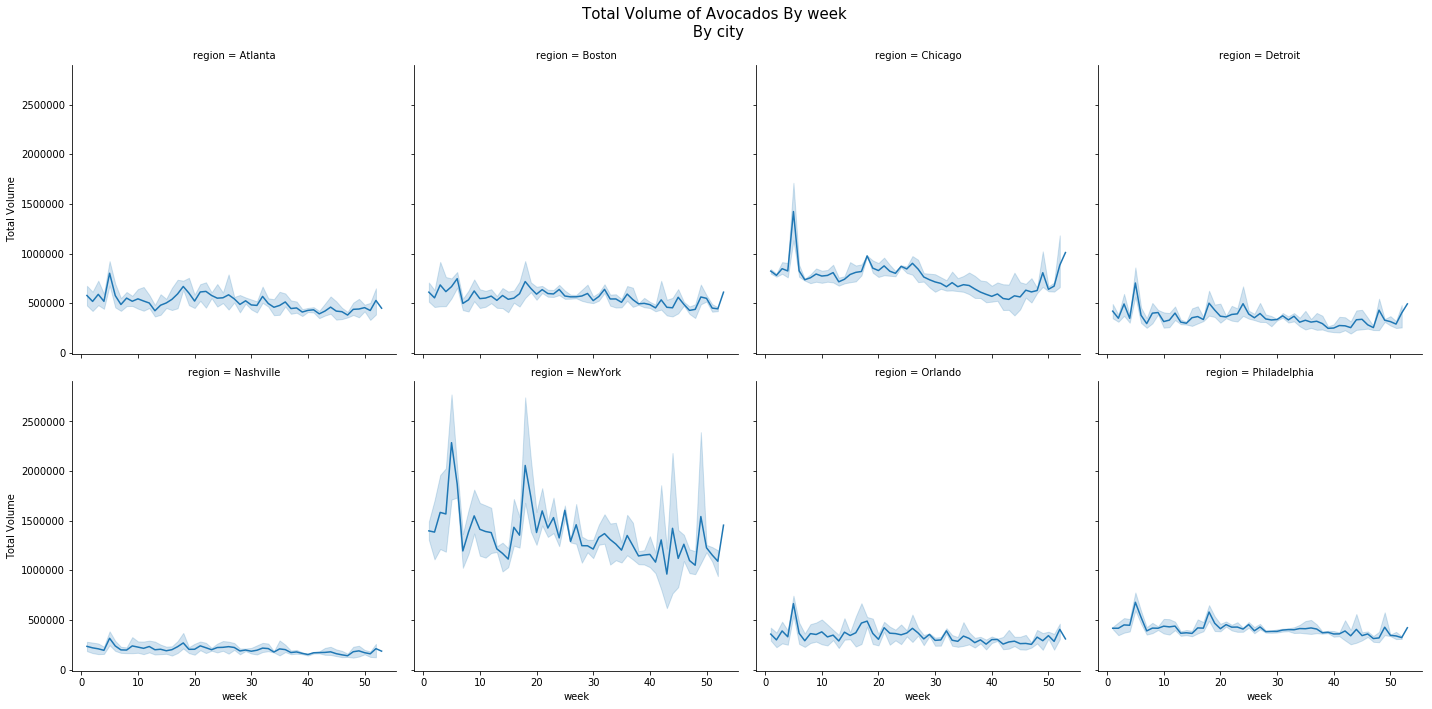

In [114]:
g = sns.FacetGrid(df_conventional, col= "region",col_wrap=4, height = 5)
g.map(sns.lineplot,'week', 'Total Volume' )
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Total Volume of Avocados By week \n By city', size = 15) 

C:\Users\afeki\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


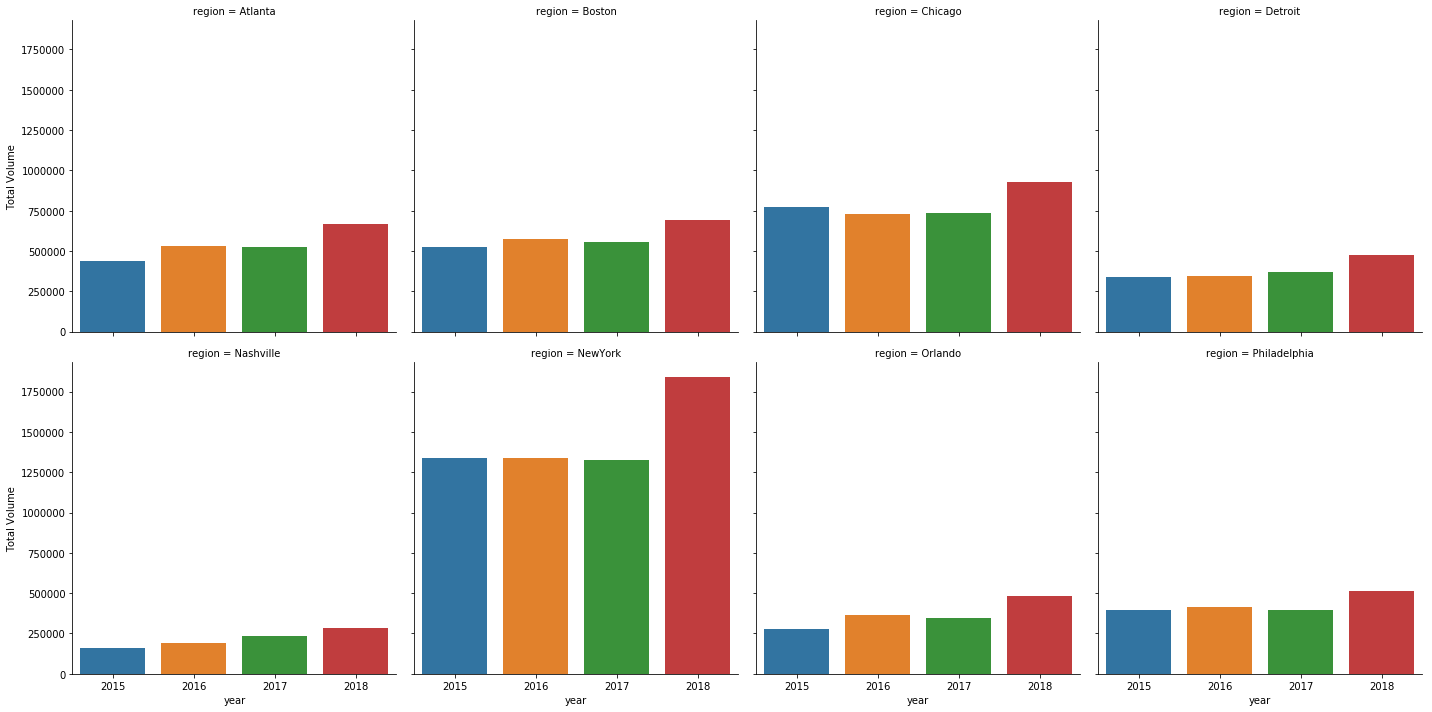

In [115]:
g = sns.FacetGrid(df_conventional, col= "region",col_wrap=4, height = 5)
g.map(sns.barplot,'year', 'Total Volume',ci=None, palette = sns.color_palette())

C:\Users\afeki\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


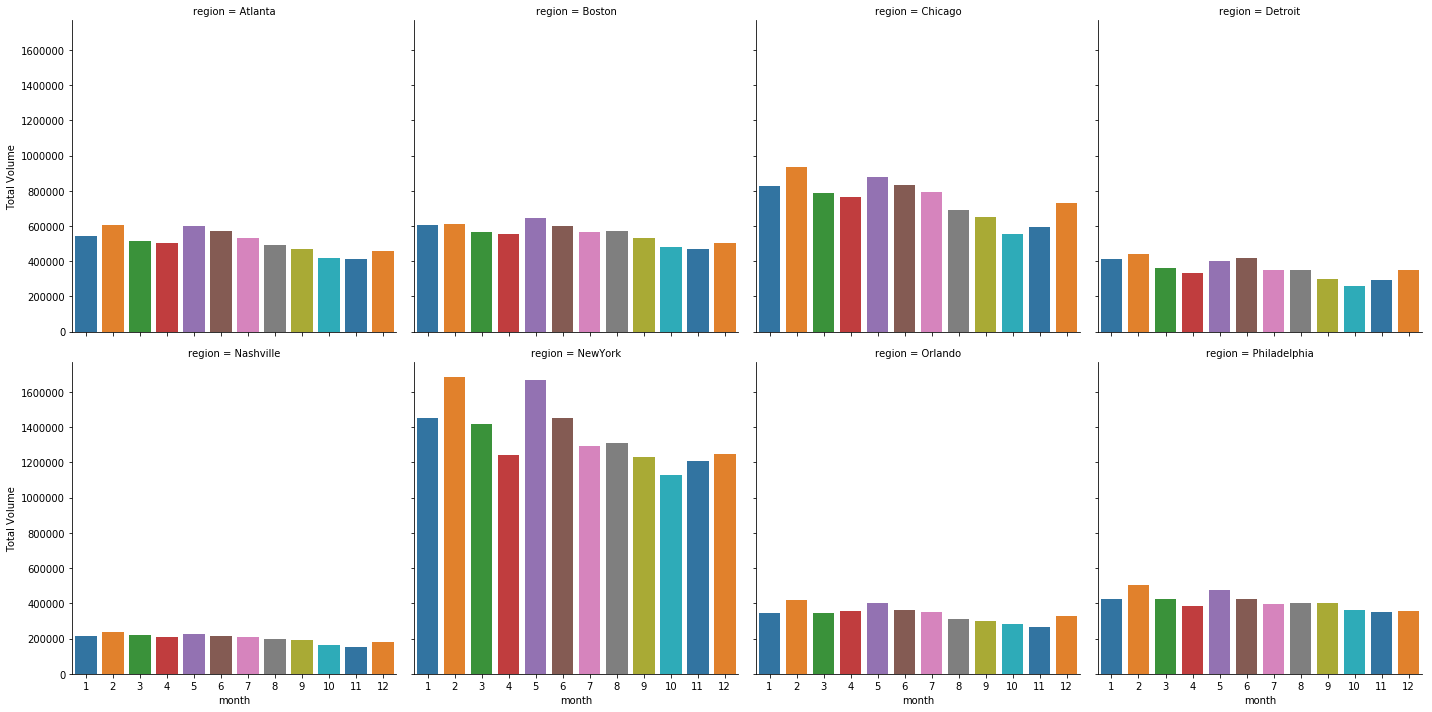

In [116]:
g = sns.FacetGrid(df_conventional, col= "region",col_wrap=4, height = 5)
g.map(sns.barplot,'month', 'Total Volume',ci=None, palette = sns.color_palette())

In [117]:
X = df_conventional[['region','month','AveragePrice','year']]
for col in ['month','region','year']:
    X[col] = X[col].astype('category')
y = df_conventional['Total Volume']

C:\Users\afeki\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


# Running ordinary least squares regression

In [118]:
X_ = pd.get_dummies(X, drop_first = True)
import statsmodels.api as sm
from scipy import stats
X2 = sm.add_constant(X_)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:           Total Volume   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     589.0
Date:                Mon, 27 May 2019   Prob (F-statistic):               0.00
Time:                        09:43:34   Log-Likelihood:                -17676.
No. Observations:                1352   AIC:                         3.540e+04
Df Residuals:                    1329   BIC:                         3.552e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                8.872e+05   2

# create a normalized 'Total Volume' column for future analysis and save to_csv

In [14]:
X_ = df_conventional[['region','month','AveragePrice','year' ,'Total Volume']]
stats_dict = X_[['region','Total Volume']].groupby('region').agg(['mean','std'])['Total Volume'].to_dict()
def norm_row(row):
    return (row['Total Volume'] - stats_dict['mean'][row['region']])/stats_dict['std'][row['region']]
X_['Total_Volume_Norm'] = X_.apply(norm_row, axis = 1)
X_.to_csv('avocado_dataset_filtered.csv')

C:\Users\afeki\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


# now after normalizaton we expect the graphs to be more simmiliar

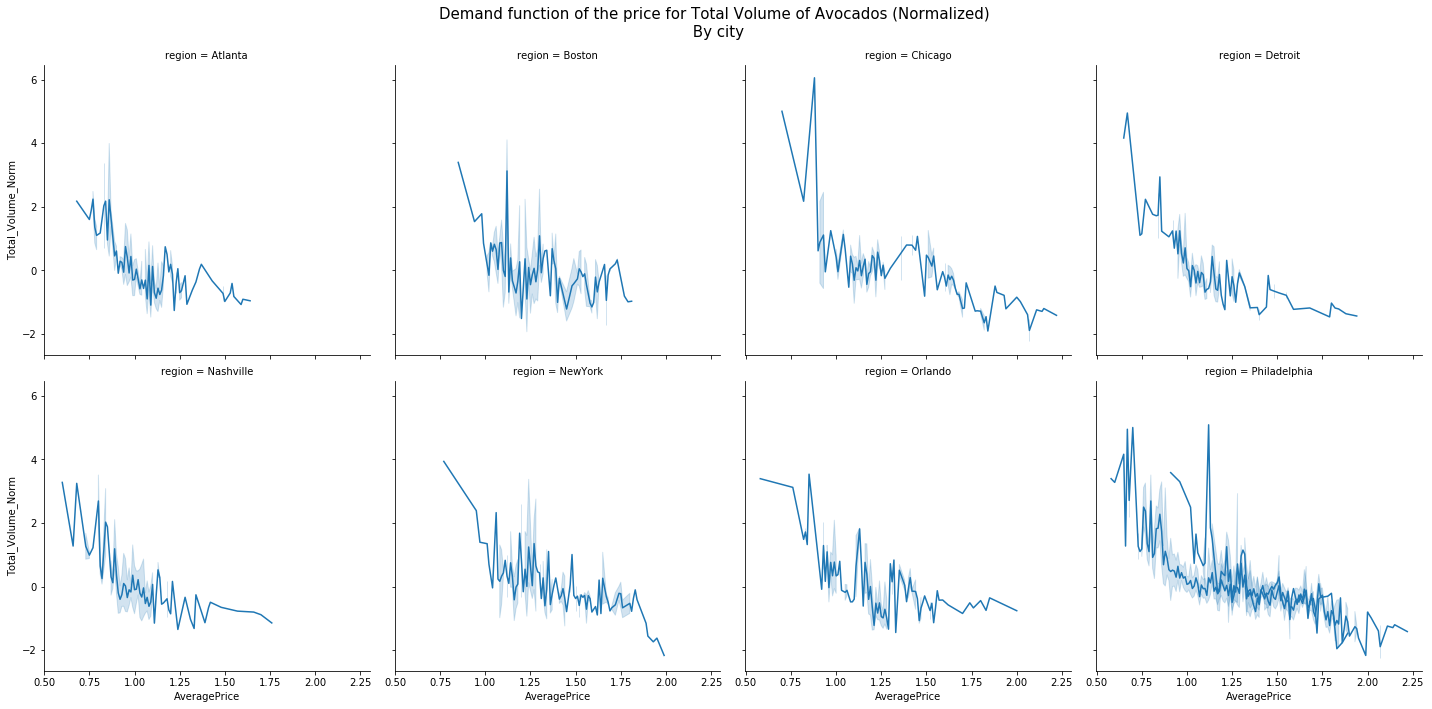

In [15]:
g = sns.FacetGrid(X_ , col= "region",col_wrap=4, height = 5)
g.map(sns.lineplot,'AveragePrice', 'Total_Volume_Norm' )
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Demand function of the price for Total Volume of Avocados (Normalized) \n By city', size = 15) 
sns.lineplot(data = X_,x = 'AveragePrice', y = 'Total_Volume_Norm' )

(0.5, 2.25)

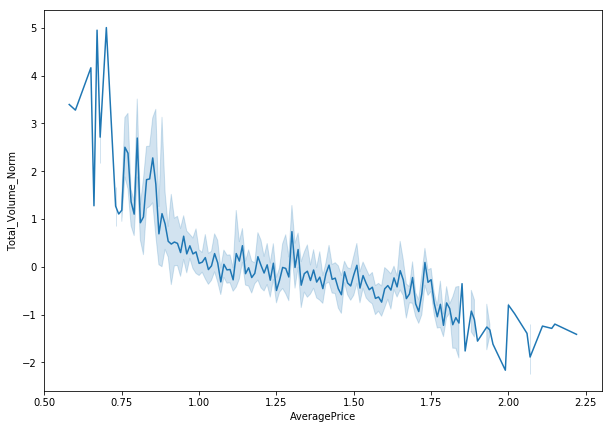

In [16]:
plt.figure(figsize=(10,7))
sns.lineplot(data = X_,x = 'AveragePrice', y = 'Total_Volume_Norm' )
ax.set_title("Demand as function of the price forTotal_Volume (Norm)", size = 15)
ax.set_xlim(0.5,2.25)

C:\Users\afeki\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     101.2
Date:                Mon, 27 May 2019   Prob (F-statistic):           4.72e-22
Time:                        00:49:18   Log-Likelihood:                -917.05
No. Observations:                 580   AIC:                             1838.
Df Residuals:                     578   BIC:                             1847.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4474      0.055     -8.143      0.0

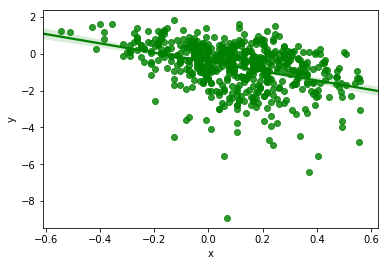

In [103]:
xy = pd.DataFrame()
xy['x'] = np.log(X_['AveragePrice'])
xy['y'] = np.log(X_['Total_Volume_Norm'])
x_e = xy.dropna()['x']
sns.regplot(x= x_e , y= xy.dropna()['y'] , color="g")
x_e = sm.add_constant(x_e)
est = sm.OLS(xy.dropna()['y'],x_e)
est2 = est.fit()
print(est2.summary())

In [102]:
for city in X_.region.unique():
    frame = X_[X_.region == city]
    xy = pd.DataFrame()
    xy['x'] = np.log(frame['AveragePrice'])
    xy['y'] = np.log(frame['Total_Volume_Norm'])
    x_e = xy.dropna()['x']
    y_e = xy.dropna()['y']
    x_e = sm.add_constant(x_e)
    est = sm.OLS(y_e ,x_e)
    est2 = est.fit()
    print('#####'*10)
    print(city)
    print(np.abs(est2.params['x']))

##################################################
Atlanta
4.113635273510457
##################################################
Boston
2.561369819243075
##################################################
Chicago
2.6809302750929547
##################################################
Detroit
6.760771864851739
##################################################
Nashville
3.333714912498329
##################################################
NewYork
4.344748226318521
##################################################
Orlando
3.2216916337293044
##################################################
Philadelphia
5.630464903671253


C:\Users\afeki\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log
  """


# 2. the soulution is..

\begin{equation*}
\frac{a +b_1x_1+ b_2x_2 \cdots + b_nx_n}{(2c)}
\end{equation*}